In [1]:
import numpy as np
import matplotlib.pylab as p
from mpl_toolkits.mplot3d import Axes3D 
from vpython import *

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
###David R. Rice
###Phys 604 Prof. Zhu
###Lecture 12 Homework

In [3]:
###Lax-Wendroff ALgorith for Burger's Equation

<IPython.core.display.Javascript object>

0
1
2
3
4
5
6
7


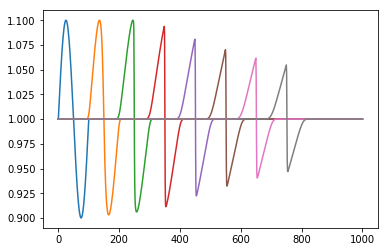

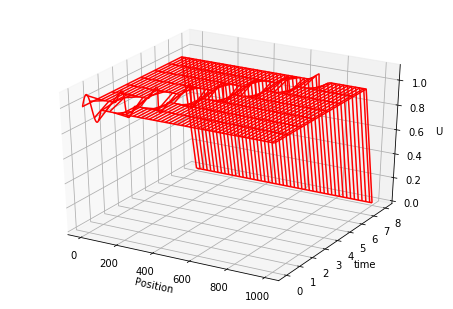

finished


In [4]:
##Unmodified Upwind
# Burger's equation: Upwind method

scene = canvas() # with this you don't need to restart kernel each time

L=100.; Nx=1001; 
tend=80.; Dtout=10.

dx=L/(Nx-1)

x=np.zeros(Nx,float)
U=np.zeros((Nx,2), float)
Up = np.zeros((Nx,int(tend/Dtout)+1),float) 

for i in range(Nx):
    x[i]=i*dx
    if  dx*i/10.<1:
        U[i,0]=1.0+0.1*np.sin(dx*i/10.*2.*np.pi)
        U[i,1]=U[i,0]
    else:
        U[i,0]=1.0
        U[i,1]=U[i,0]

toutn=0
t=0.
while t < tend:        
    dt=min(dx/abs((U[:,0]+1.e-10)))
    for ix in range(1, Nx - 1):
        if U[ix,0]>0:
            U[ix, 1] = U[ix,0]-0.5*dt/dx*(U[ix,0]*U[ix,0]-U[ix-1,0]*U[ix-1,0])# finish this     
        else:
            U[ix, 1] = U[ix,0]-0.5*dt/dx*(U[ix+1,0]*U[ix+1,0]-U[ix,0]*U[ix,0])# finish this
    if t >= toutn*Dtout: 
        p.plot(U[:,1])
        Up[:,toutn] = U[:,1]   
        print(toutn)   
        toutn += 1                        
    for ix in range (1, Nx - 1):  U[ix, 0] = U[ix, 1] 
    t+=dt
    ind=int(t/dx)
    #sol = curve(pos=[vector(-5.,U[ind,0]*10.-10.,0), vector(-5.+dx,U[ind+1,0]*10.-10.,0)], color = color.yellow)
                        # Plot every other point
    #for k in range(2, int(10./dx)): 
    #    sol.append(vector(-5.+dx*k,U[ind+k,0]*10.-10.,0))
    #rate(100)
    #for obj in scene.objects:
     #   obj.visible=0
        
x = list(range(0, Nx))                       # Plot alternate pts
y = list(range(0, int(tend/Dtout)+1))                      
X, Y = p.meshgrid(x, y) 


def functz(Tpl):                            
    z = Tpl[X, Y]       
    return z

Z = functz(Up)              
fig = p.figure()                                          # Create figure
ax = Axes3D(fig)                                              
ax.plot_wireframe(X, Y, Z, color = 'r')                    
ax.set_xlabel('Position')                                     
ax.set_ylabel('time')
ax.set_zlabel('U')
p.show()                               
print("finished") 

<IPython.core.display.Javascript object>


1.0*Dx/V2
3
4
5
6
7


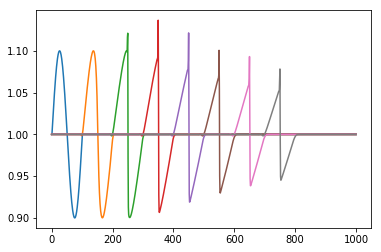

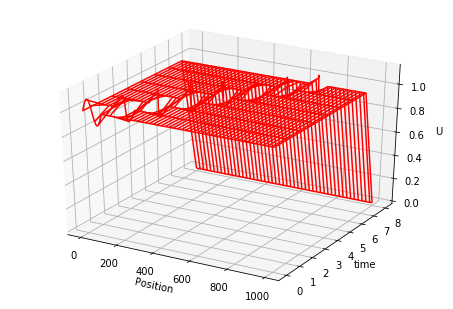

finished

0.5*Dx/V
0
1
2
3
4
5
6
7


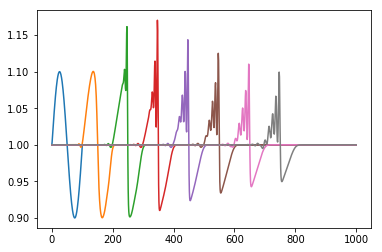

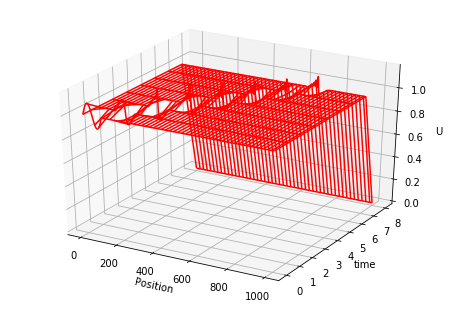

finished

0.1*Dx/V
0
1
2
3
4
5
6
7


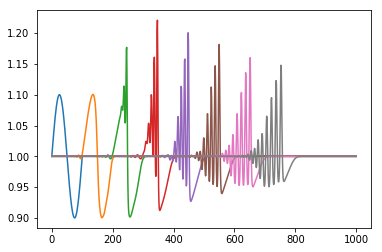

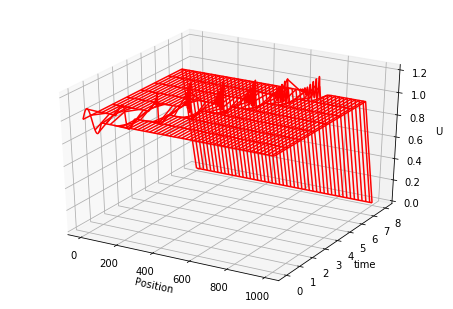

finished


In [6]:
##Lax-Wendroff for Burger's Equation

p.close()
scene = canvas() # with this you don't need to restart kernel each time

for var in [1.,0.5,0.1]:
    print('\n'+str(var)+'*Dx/V')
    L=100.; Nx=1001; 
    tend=80.; Dtout=10.

    dx=L/(Nx-1)

    x=np.zeros(Nx,float)
    U=np.zeros((Nx,2), float)
    Up = np.zeros((Nx,int(tend/Dtout)+1),float) 
    ep=1.

    for i in range(Nx):
        x[i]=i*dx
        if  dx*i/10.<1:
            U[i,0]=1.0+0.1*np.sin(dx*i/10.*2.*np.pi)
            U[i,1]=U[i,0]
        else:
            U[i,0]=1.0
            U[i,1]=U[i,0]

    toutn=0
    t=0.

    while t < tend:        
        dt=min(var*dx/abs((U[:,0]+1.e-10)))
        #dt=dx
        for ix in range(1, Nx - 1):
            U[ix, 1] = U[ix,0]-0.25*((dt*ep)/dx)*(U[ix+1,0]*U[ix+1,0]-U[ix-1,0]*U[ix-1,0])\
                +(1./8.)*((dt*dt*ep*ep)/(dx*dx))*(((U[ix+1,0]+U[ix,0])*(U[ix+1,0]*U[ix+1,0]-U[ix,0]*U[ix,0]))\
                                        -((U[ix,0]+U[ix-1,0])*(U[ix,0]*U[ix,0]-U[ix-1,0]*U[ix-1,0])))

        if t >= toutn*Dtout: 
            p.plot(U[:,1])
            Up[:,toutn] = U[:,1]   
            print(toutn)   
            toutn += 1  

        for ix in range (1, Nx - 1):  U[ix, 0] = U[ix, 1] 
        t+=dt
        ind=int(t/dx)
        sol = curve(pos=[vector(-5.,U[ind,0]*10.-10.,0), vector(-5.+dx,U[ind+1,0]*10.-10.,0)], color = color.yellow)
                        # Plot every other point
        for k in range(2, int(10./dx)): 
            sol.append(vector(-5.+dx*k,U[ind+k,0]*10.-10.,0))
        rate(100)
        for obj in scene.objects:
            obj.visible=0
        
    x = list(range(0, Nx))                       # Plot alternate pts
    y = list(range(0, int(tend/Dtout)+1))                      
    X, Y = p.meshgrid(x, y) 


    def functz(Tpl):                            
        z = Tpl[X, Y]       
        return z

    Z = functz(Up)              
    fig = p.figure()                                          # Create figure
    ax = Axes3D(fig)                                              
    ax.plot_wireframe(X, Y, Z, color = 'r')                    
    ax.set_xlabel('Position')                                     
    ax.set_ylabel('time')
    ax.set_zlabel('U')
    p.show()                               
    print("finished") 
    p.close()

In [5]:
#3 Compare the Results with the resutls using upwind.
## The Lax-Wendroff Algorithm is superior to the upwind method because it is second-order.
## In first order the shock wave loses intensity as it breaks up into small ripples.
## The second order maintains the square edge much better.
## However, the second order needs smaller time step in order to be smooth.


0
